In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer , ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline , make_pipeline

from sklearn.model_selection import train_test_split,GridSearchCV


from sklearn.preprocessing import OneHotEncoder , StandardScaler , OrdinalEncoder

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
df_train =pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test =pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

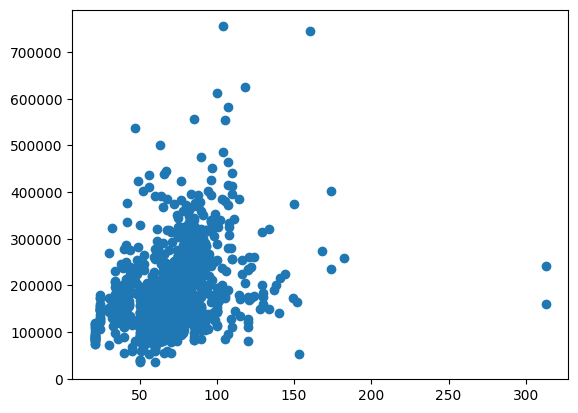

In [5]:
plt.scatter(x='LotFrontage', y='SalePrice', data=df_train)

In [6]:
df_train.query('LotFrontage > 255')
#934 1298

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


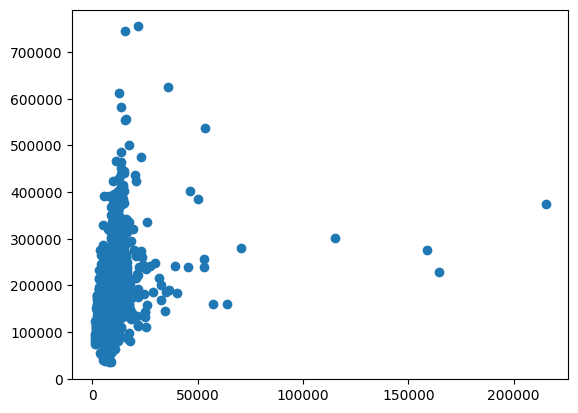

In [7]:
plt.scatter(x='LotArea', y='SalePrice', data=df_train)

In [8]:
df_train.query('LotArea > 150000')
#249 313 33

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950


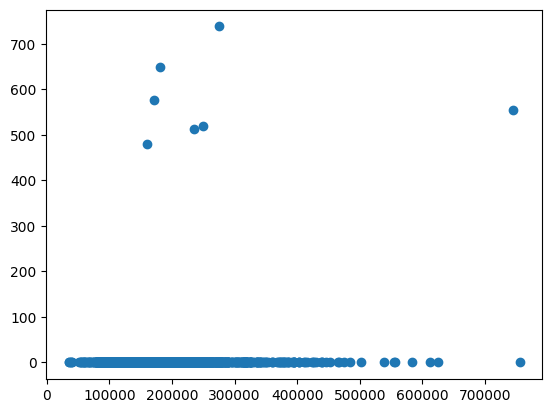

In [9]:
plt.scatter(y='PoolArea' , x='SalePrice' , data=df_train)
#drop column

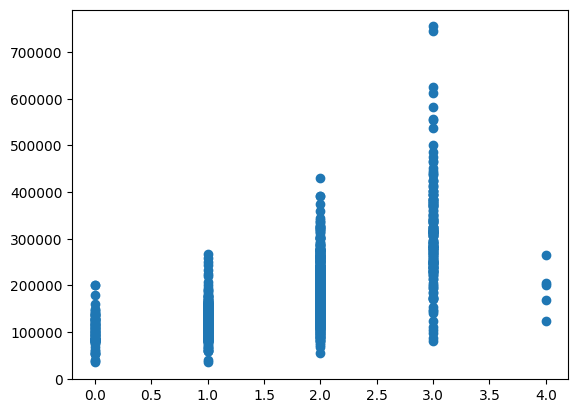

In [10]:
plt.scatter(y='SalePrice',x='GarageCars',data=df_train)

In [11]:
df_train.query('GarageCars >3')

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
420,421,90,RM,78.0,7060,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Alloca,206300
747,748,70,RM,65.0,11700,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,265979
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1340,1341,20,RL,70.0,8294,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,6,2007,WD,Normal,123000
1350,1351,90,RL,91.0,11643,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,200000


In [12]:
df_train.drop(index=[249 ,313 ,33,934, 1298],inplace=True)

#check all values and assign the nan values 

In [13]:
pd.DataFrame(df_train.isnull().sum().sort_values(ascending=False)).head(25)
# \drop first 5 columns 



,0
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
MasVnrType,869
FireplaceQu,690
LotFrontage,258
GarageYrBlt,81
GarageCond,81
GarageType,81


In [14]:
df_train['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [15]:
df_train['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,  38.,
       109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144., 114.,
       128., 149., 168., 182., 138., 160., 152., 124., 153.,  46.])

In [16]:
df_train['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [17]:
df_train['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [18]:
nums = ['LotFrontage','MasVnrArea']
cats = ['FireplaceQu','GarageCond','GarageType','GarageFinish','GarageQual','BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','Electrical']
df_train[nums]=df_train[nums].fillna(0)
df_test[nums]=df_test[nums].fillna(0)

df_train[cats]=df_train[cats].fillna('No')
df_test[cats]=df_test[cats].fillna('No')

In [19]:
pd.DataFrame(df_train.isnull().sum().sort_values(ascending=False)).head(8)

,0
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
MasVnrType,869
GarageYrBlt,81
Id,0
KitchenAbvGr,0


In [20]:
df_train=df_train.drop(columns=['Alley','Fence','MasVnrType','GarageYrBlt','PoolQC','Id','MiscFeature'])

In [21]:
df_test=df_test.drop(columns=['Alley','Fence','MasVnrType','GarageYrBlt','PoolQC','Id','MiscFeature'])

In [22]:
df_train.dtypes[df_train.dtypes == 'object']

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

split them for either onehotencoder or ordinalEncoder
Check dataset for information 

In [23]:
ore = ['LandSlope','LotShape','Utilities','LandSlope','BldgType','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive']
ohe = ['LotConfig','MSZoning','Street','LandContour','LotConfig','Neighborhood','Condition1','Condition2','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','Foundation','Heating','CentralAir','Electrical','Functional','GarageType','SaleType','SaleCondition']

In [24]:
num_cols = df_train.select_dtypes(include=['int64','float64']).columns
nums_cols = num_cols.drop('SalePrice')

In [25]:
nums_pipe = Pipeline(steps=[
    ('impute',SimpleImputer(strategy="mean")),
    ('Scaler',StandardScaler())
])

In [26]:
ore_pipe = Pipeline(steps=[
     ('impute',SimpleImputer(strategy="most_frequent")),
    ('ODE',OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=-1))
])

In [27]:
ohe_pipe = Pipeline(steps=[
        ('impute',SimpleImputer(strategy="most_frequent")),
    ('OHE',OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])

In [28]:
preprocessor = ColumnTransformer(transformers=[
    ('nums',nums_pipe,nums_cols),
    ('ore',ore_pipe,ore),
    ('ohe',ohe_pipe,ohe)
],
    remainder='passthrough',
    n_jobs=-1
                                
                                )

In [29]:
pipeline_final = Pipeline(steps=[
    ('preprocessing',preprocessor)
])

In [30]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [31]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [32]:
X=df_train.drop('SalePrice',axis=1)
y=df_train['SalePrice']

In [33]:
X.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 73, dtype: object

In [34]:
n_train = X.shape[0]
print(n_train)

1455


In [35]:
#combine both test and train dataset before preprocessing 
df=pd.concat([X,df_test],axis=0)
df.reset_index(drop=True , inplace=True)
df.shape

(2914, 73)

In [36]:
# Preprocessing the combined data frame
df_preprocess = pipeline_final.fit_transform(df)

In [37]:
#split the dataframe back to the train and test
x_after_preprocess= df_preprocess[:n_train]
df_test_pre = df_preprocess[n_train:]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x_after_preprocess,y,test_size=0.2,random_state=11)

In [39]:
linearR=LinearRegression()

In [40]:
df_train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 74, dtype: object

In [41]:
linearR.fit(X_train , y_train)

LinearRegression()

In [42]:
y_pred=linearR.predict(X_test)

In [43]:
from sklearn.metrics import r2_score, mean_absolute_error


print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: -2.140868089045567e+19
MAE: 35951793415670.766
RMSE: 363904591765892.6


In [44]:
xgb_model=XGBRegressor()

In [45]:
param_xgb={
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
    
}



In [46]:
xgb_gridsearch=GridSearchCV(xgb_model,param_xgb,cv=5,scoring="r2")

In [47]:
xgb_gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='r2')

In [48]:
print("Best R²:", xgb_gridsearch.best_score_)
print("Best params:", xgb_gridsearch.best_params_)

Best R²: 0.8659497996166342
Best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


In [49]:
y_pred_xgb= xgb_gridsearch.best_estimator_.predict(X_test)

In [50]:
print("R² Score:", r2_score(y_test, y_pred_xgb))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))

R² Score: 0.8915054733029448
MAE: 14726.283196413231
RMSE: 25905.769437020623


In [51]:
RMR_model=RandomForestRegressor()

In [52]:
RMR_model.fit(X_train,y_train)

RandomForestRegressor()

In [53]:
y_pred_rmr=RMR_model.predict(X_test)

In [54]:
print("R² Score:", r2_score(y_test, y_pred_rmr))
print("MAE:", mean_absolute_error(y_test, y_pred_rmr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rmr)))

R² Score: 0.8742099306605873
MAE: 16087.433333333332
RMSE: 27894.318758537695


In [55]:
from lightgbm import LGBMRegressor 

In [56]:
lgbm_model=LGBMRegressor()

In [57]:
lgbm_model.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3072
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 135
[LightGBM] [Info] Start training from score 180382.450172


LGBMRegressor()

In [58]:
y_pred_lgbm=lgbm_model.predict(X_test)

In [59]:
print("R² Score:", r2_score(y_test, y_pred_lgbm))
print("MAE:", mean_absolute_error(y_test, y_pred_lgbm))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lgbm)))

R² Score: 0.8952831018163725
MAE: 14605.562934611626
RMSE: 25450.77232663629


In [60]:
original_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
original_test.count

<bound method DataFrame.count of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour U

In [65]:
#since the LightGBM Regressor scored the best it will be the model used to submit the output
y_lgbm=lgbm_model.predict(df_test_pre)

original_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

# rebuild the submission file
submission = pd.DataFrame({
    "Id": original_test["Id"],
    "SalePrice": y_lgbm
})

submission.to_csv("submission1.csv", index=False)

In [63]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal
